## SVM Classification

In [1]:
## Initialize Libraries
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import  LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support,recall_score,accuracy_score
from sklearn.model_selection import GridSearchCV

sns.set(style="whitegrid", color_codes=True)
import itertools
%matplotlib inline  

In [2]:
## Define Confusion Matrix Function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = 3*cm.max()/4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def pretty_metrics(precision_recall_fscore=0,accuracy_score=0):
    if precision_recall_fscore==0:
        metric_dict={'accuracy':[],'precision':[],'recall':[],'F1':[]}
        return metric_dict
    #This function prints out the precision, recall,f-score and accuracy is also saves the result to a dictionary 
    metric_dict={'accuracy':[],'precision':[],'recall':[],'F1':[]}
    metric_dict['accuracy']=accuracy_score
    metric_dict['precision']=precision_recall_fscore[0][1]
    metric_dict['recall']=precision_recall_fscore[1][1]
    metric_dict['F1']=precision_recall_fscore[2][1]
    [print(key,value) for key, value in metric_dict.items()]
    return metric_dict


def Norm(x):
    return((x-x.mean())/x.std())

In [3]:
## Load the CSV file
data_file = 'https://raw.githubusercontent.com/db-bangs/A5016/main/d20130924_refl_ndvi_sk.csv'
crop_data = pd.read_csv(data_file, sep = ",")

In [4]:
crop_data.head()

,X,V1,V2,V3,V4,V5,V6,V7,V8,Crop,NDVI_sd,NDVI_kt,NDVI_sk,NDVI
0,1,0.08029,0.06889,0.05869,0.06374,0.10378,0.00082,0.12382,0.09167,Soybeans,0.007589,-0.652732,0.199005,0.238687
1,2,0.07644,0.06332,0.05888,0.04370,0.20840,0.00084,0.12492,0.06994,Corn,0.047886,0.441504,-0.213983,0.656629
2,3,0.07460,0.06156,0.05488,0.04416,0.18868,0.00096,0.11252,0.06026,Soybeans,0.075923,2.905492,-1.653555,0.619788
3,4,0.07514,0.06348,0.05306,0.05266,0.11797,0.00088,0.12423,0.08217,Corn,0.063182,-0.995496,-0.037232,0.380169
4,5,0.08060,0.06930,0.05936,0.06480,0.10532,0.00088,0.12530,0.09204,Soybeans,0.010109,-0.441190,0.433803,0.237682


#### Classification: 7 Bands Reflectance

time: 0.014856338500976562  sec
time: 0.015582561492919922  sec
accuracy 0.8
precision 0.725
recall 0.8613861386138614
F1 0.7873303167420814
Confusion matrix, without normalization
[[118  11  11]
 [ 20  87  13]
 [  4   3  43]]


C:\Users\debangs\AppData\Local\Temp\ipykernel_14584\3038309493.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


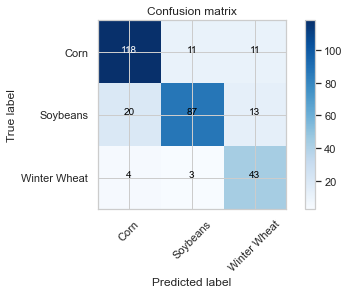

In [20]:
## Test-Train Split
X = crop_data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7']]
y = crop_data[['Crop']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3,random_state=0)

SVM=SVC(C=10, kernel='rbf',cache_size=600)

startTime=time.time()
SVM.fit(X_train,y_train.values.ravel())
lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )

startTime=time.time()
yhat=SVM.predict(X_test)
lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )
yhat[0:5]

prf1=precision_recall_fscore_support(y_test,yhat)
acc=accuracy_score(y_test,yhat)
metric=pretty_metrics(precision_recall_fscore=prf1,accuracy_score=acc)

target_names = ['Corn', 'Soybeans', 'Winter Wheat']
plot_confusion_matrix(confusion_matrix(yhat,y_test),
                      classes=target_names,title='Confusion matrix')

#### Classification 5 Bands + NDVI

time: 0.016684293746948242  sec
time: 0.01192474365234375  sec
accuracy 0.7903225806451613
precision 0.7073170731707317
recall 0.8613861386138614
F1 0.7767857142857142
Confusion matrix, without normalization
[[117  11  12]
 [ 22  87  14]
 [  3   3  41]]


C:\Users\debangs\AppData\Local\Temp\ipykernel_14584\3038309493.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


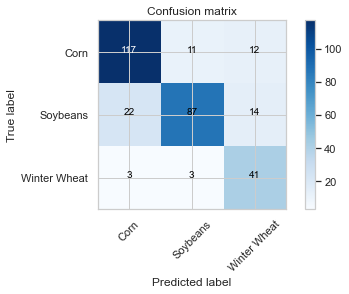

In [19]:
## Test-Train Split
X = crop_data[['V1', 'V2', 'V3', 'V6', 'V7', 'NDVI']]
y = crop_data[['Crop']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3,random_state=0)

SVM=SVC(C=10, kernel='rbf',cache_size=600)

startTime=time.time()
# this is where we fit the model  
SVM.fit(X_train,y_train.values.ravel())
lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )

startTime=time.time()
# this is where we fit the model  
yhat=SVM.predict(X_test)
lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )
yhat[0:5]

prf1=precision_recall_fscore_support(y_test,yhat)
acc=accuracy_score(y_test,yhat)
metric=pretty_metrics(precision_recall_fscore=prf1,accuracy_score=acc)

target_names = ['Corn', 'Soybeans', 'Winter Wheat']
plot_confusion_matrix(confusion_matrix(yhat,y_test),
                      classes=target_names,title='Confusion matrix')

#### Classification 5 Bands + NDVI + Skew

time: 0.031301259994506836  sec
time: 0.02011704444885254  sec
accuracy 0.6612903225806451
precision 0.6268656716417911
recall 0.8316831683168316
F1 0.7148936170212766
Confusion matrix, without normalization
[[120  15  38]
 [ 22  84  28]
 [  0   2   1]]


C:\Users\debangs\AppData\Local\Temp\ipykernel_14584\3038309493.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


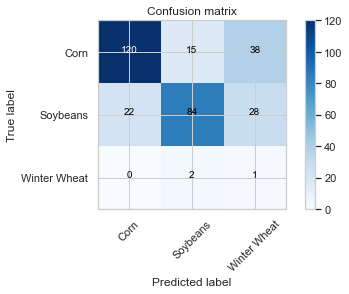

In [18]:
## Test-Train Split
X = crop_data[['V1', 'V2', 'V3', 'V6', 'V7', 'NDVI', 'NDVI_sk']]
y = crop_data[['Crop']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3,random_state=0)

SVM=SVC(C=10, kernel='rbf',cache_size=600)

startTime=time.time()
# this is where we fit the model  
SVM.fit(X_train,y_train.values.ravel())
lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )

startTime=time.time()
# this is where we fit the model  
yhat=SVM.predict(X_test)
lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )
yhat[0:5]

prf1=precision_recall_fscore_support(y_test,yhat)
acc=accuracy_score(y_test,yhat)
metric=pretty_metrics(precision_recall_fscore=prf1,accuracy_score=acc)

target_names = ['Corn', 'Soybeans', 'Winter Wheat']
plot_confusion_matrix(confusion_matrix(yhat,y_test),
                      classes=target_names,title='Confusion matrix')

#### Classification: NDVI + Skew

In [16]:
## Test-Train Split
X = crop_data[['NDVI', 'NDVI_sk']]
y = crop_data[['Crop']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3,random_state=0)

SVM=SVC(C=10, kernel='rbf',cache_size=600)

startTime=time.time()
# this is where we fit the model  
SVM.fit(X_train,y_train.values.ravel())
lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )

startTime=time.time()
# this is where we fit the model  
yhat=SVM.predict(X_test)
lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )
yhat[0:5]

prf1=precision_recall_fscore_support(y_test,yhat)
acc=accuracy_score(y_test,yhat)
metric=pretty_metrics(precision_recall_fscore=prf1,accuracy_score=acc)

time: 0.015794992446899414  sec
time: 0.014239311218261719  sec
accuracy 0.6612903225806451
precision 0.6268656716417911
recall 0.8316831683168316
F1 0.7148936170212766


Confusion matrix, without normalization
[[120  15  38]
 [ 22  84  28]
 [  0   2   1]]


C:\Users\debangs\AppData\Local\Temp\ipykernel_14584\3038309493.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


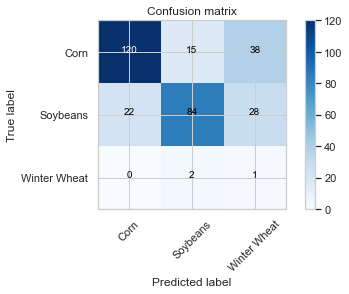

In [17]:
target_names = ['Corn', 'Soybeans', 'Winter Wheat']
plot_confusion_matrix(confusion_matrix(yhat,y_test),
                      classes=target_names,title='Confusion matrix')

#### Grid Search Code - Raises Errors

In [9]:
## Grid Search for Hyperparameters
param_grid = [{'C': [0.01,0.1 ,1, 10 ]}]

grid = GridSearchCV(LinearSVC(), cv=3, param_grid=param_grid,scoring="precision",n_jobs=-1)
grid

GridSearchCV(cv=3, estimator=LinearSVC(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10]}], scoring='precision')

In [10]:
startTime=time.time()

## Set Crop to Int
crop_data['Crop Int'] = crop_data['Crop'].replace(to_replace=['Corn', 'Soybeans', 'Winter Wheat'], value = [0,1,2])

X = crop_data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7']]
y = crop_data[['Crop Int']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3,random_state=0)

grid.fit(X_train,y_train.values.ravel())
lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )
grid.best_params_

time: 3.6794745922088623  sec


C:\Users\debangs\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


{'C': 0.01}

In [11]:
SVM=grid.best_estimator_
yhat=SVM.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [12]:
prf1=precision_recall_fscore_support(y_test,yhat)
acc=accuracy_score(y_test,yhat)
metric=pretty_metrics(precision_recall_fscore=prf1,accuracy_score=acc)

accuracy 0.45806451612903226
precision 0.0
recall 0.0
F1 0.0


C:\Users\debangs\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
crop_data.head()

,X,V1,V2,V3,V4,V5,V6,V7,V8,Crop,NDVI_sd,NDVI_kt,NDVI_sk,NDVI,Crop Int
0,1,0.08029,0.06889,0.05869,0.06374,0.10378,0.00082,0.12382,0.09167,Soybeans,0.007589,-0.652732,0.199005,0.238687,1
1,2,0.07644,0.06332,0.05888,0.04370,0.20840,0.00084,0.12492,0.06994,Corn,0.047886,0.441504,-0.213983,0.656629,0
2,3,0.07460,0.06156,0.05488,0.04416,0.18868,0.00096,0.11252,0.06026,Soybeans,0.075923,2.905492,-1.653555,0.619788,1
3,4,0.07514,0.06348,0.05306,0.05266,0.11797,0.00088,0.12423,0.08217,Corn,0.063182,-0.995496,-0.037232,0.380169,0
4,5,0.08060,0.06930,0.05936,0.06480,0.10532,0.00088,0.12530,0.09204,Soybeans,0.010109,-0.441190,0.433803,0.237682,1


Confusion matrix, without normalization
[[142 101  67]
 [  0   0   0]
 [  0   0   0]]


C:\Users\debangs\AppData\Local\Temp\ipykernel_14584\3038309493.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


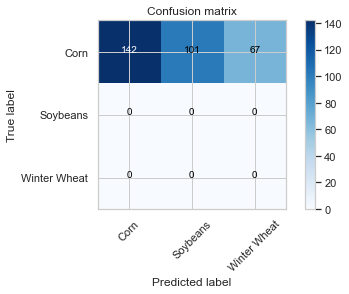

In [14]:
target_names = ['Corn', 'Soybeans', 'Winter Wheat']
plot_confusion_matrix(confusion_matrix(yhat,y_test),
                      classes=target_names,title='Confusion matrix')